In [3]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('income.csv')

In [5]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


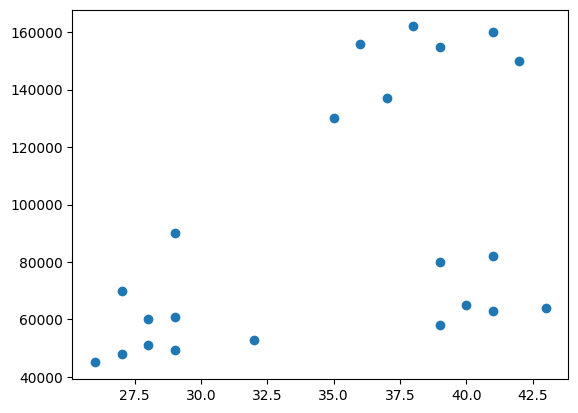

In [7]:
plt.scatter(df['Age'],df['Income($)'])

In the above plot, we can clearly see 3 different clusters.\
KMeans algorithm should infer the same

In [8]:
km = KMeans(n_clusters=3)

In [11]:
y_predicted = km.fit_predict(df[['Age','Income($)']])

Add the predicted cluster values to the income df

In [12]:
df['cluster'] = y_predicted

In [13]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [15]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

Plot with clusters and centroid differentiation using different colours

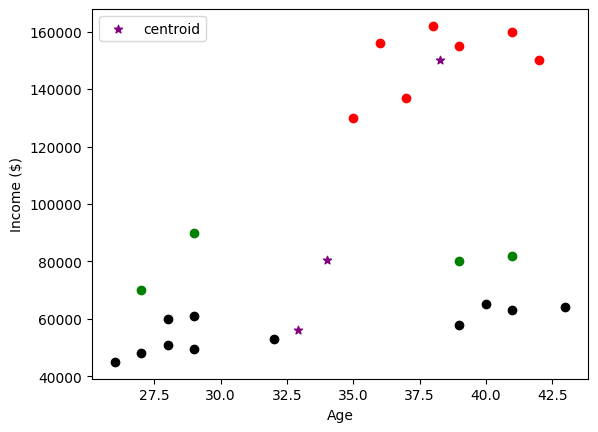

In [16]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Age')
plt.ylabel('Income ($)')

plt.legend()

We see that the Red cluster and Centroid are fine but Blue and Green are not.\
This is because the X and Y features are not scaled porportionally.\
We will now scale them using preprocessing library.

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

In [21]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [23]:
y_predicted = km.fit_predict(df[['Age','Income($)']])

In [24]:
df['cluster'] = y_predicted

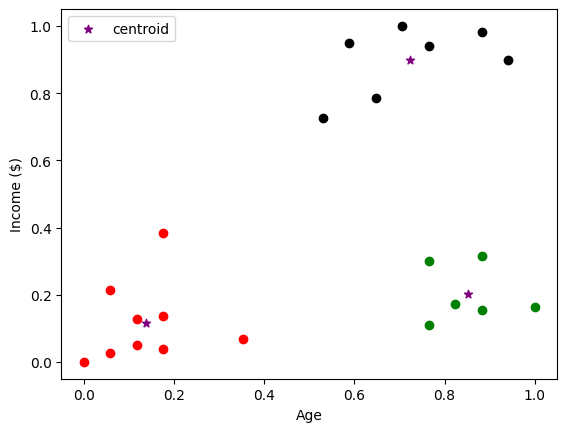

In [25]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Age')
plt.ylabel('Income ($)')

plt.legend()

We now see that it has predicted correct clusters and centroid.

We have visually confirmed that there are 3 clusters.\
Let us see if **Elbow Plot** confirms the same.

In [28]:
sse = [] # initialize sum of squared errors
k_range = range(1,10) # test range of k
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_) # append sse value for k

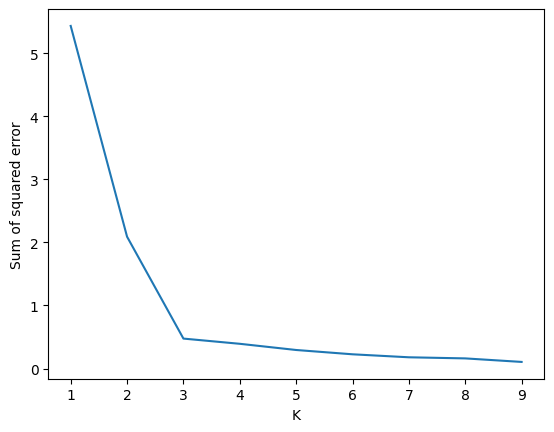

In [30]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)

The above plot confirms **Elbow** at 3